<a href="https://colab.research.google.com/github/DmitriyGord/MachineLearningLabs/blob/main/Laba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/playstore-analysis.csv', sep=',')
data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
data = data.drop(['App', 'Android Ver', 'Current Ver', 'Price', 'Genres'], axis='columns')

def replace_cr(cr):
  if cr == ('Everyone'):
    return 1
  return 0

data['Content Rating'] = data['Content Rating'].apply(replace_cr)

counts = data['Category'].value_counts()
nan_count = data['Category'].isnull().sum()

def replace_cat(cat):
  if pd.isnull(cat):
    return nan_count
  return counts[cat]

data['Category'] = data['Category'].apply(replace_cat) 

def delplus(inst):
  return inst[:-1]

data['Installs'] = data['Installs'].apply(delplus) 

def strtoint(string):
  if ',' in string:
    return int(string.replace(',',''))
  return string

data['Installs'] = data['Installs'].apply(strtoint)
data = data.drop([10472])
data['Installs'] = pd.to_numeric(data['Installs'])
def textsplit(text):
  return text.split(',')[-1]
  
data['Last Updated'] = data['Last Updated'].apply(textsplit)
data['Last Updated'] = data['Last Updated'].astype(int)

data['Reviews'] = pd.to_numeric(data['Reviews'])
def f4free(free):
  if free == ('Free'):
    return 1
  return 0
  
data['Type'] = data['Type'].apply(f4free)

def binary_nans(value):
  if pd.isnull(value):
    return 2.5
  return value

for col in ['Rating']:
  data[col] = data [col].apply(binary_nans)

data = data.drop([9148])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10839 non-null  int64  
 1   Rating          10839 non-null  float64
 2   Reviews         10839 non-null  int64  
 3   Size            10839 non-null  float64
 4   Installs        10839 non-null  float64
 5   Type            10839 non-null  int64  
 6   Content Rating  10839 non-null  int64  
 7   Last Updated    10839 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 762.1 KB


In [ ]:
X = data[data.columns.difference(['Type'])]
y = data['Type']

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l1',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1e4,
    # параметр для остановки поиска решения.(прекращается процесс обучения когда приближаемся к локальному минимому равному переменной tol)
    tol=1e-4,
    # Так как распознается 2 класса. 
    multi_class='ovr'
    )

In [ ]:
model.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=10000.0, multi_class='ovr', penalty='l1',
                   solver='liblinear')

In [ ]:
pred_prob = model.predict_proba(X)

In [ ]:
preds = pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

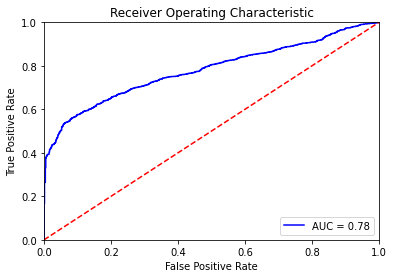

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Результаты применения L1 и L2 

penalty='l2' C=1 AUC = 0.74

penalty='l2' C=1e2 AUC = 0.74

penalty='l2' C=1e4 AUC = 0.74

penalty='l1' C=1 AUC = 0.72

penalty='l1' C=1e2 AUC = 0.78

penalty='l1' C=1e4 AUC = 0.78

переменные tol и multi_class не менялись

In [ ]:
model.coef_

array([[-2.67882474e-04, -1.83222894e-01,  7.05215025e-07,
         2.47512910e-04, -3.14531367e-02, -1.54654290e-06,
        -2.85440908e-06]])

In [ ]:
len(model.coef_[0])

7

In [ ]:
# для наглядности сделаем все в словаре, тк после удаления можем потерять нумерацию столбцов
col = [i for i in range(7)]
listValues = model.coef_[0]
myDict = {col[i]:listValues[i] for i in range(0, len(col), 1)} 
for key in myDict:
    print(key, '->', myDict[key])

0 -> -0.0002678824738463644
1 -> -0.18322289387799148
2 -> 7.052150251047534e-07
3 -> 0.00024751291047726826
4 -> -0.03145313673741645
5 -> -1.5465428969460972e-06
6 -> -2.8544090791295195e-06


In [ ]:
# если значения признака меньше 0.01 удалим его (считаем их близкими к нулю)
key_new = list()
for key in myDict:
    if myDict[key] < 0.0000001:
        key_new.append(key)
print(key_new) # номера столбцов которые мы будем удалять для метода ближайших соседей

[0, 1, 4, 5, 6]


In [ ]:
c = data.columns

In [ ]:
for i in key_new:
     data.drop([c[i]], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       10839 non-null  int64  
 1   Size          10839 non-null  float64
 2   Last Updated  10839 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 338.7 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор
clf = KNeighborsClassifier(n_neighbors=3)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
clf.score(X_test, y_test)

0.9195571955719557